# Numerical Solution using NumPy

In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
A = make_spd_matrix(n_dim = 10)
B = np.random.randint(5,size=10)
C = np.random.randint(5)
x = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,])

In [2]:
def f(x):
    return np.dot(x.T,np.dot(A,x))-2*np.dot(B,x)+C

In [3]:
f(x)

-3.4929680717776526

In [4]:
def grad(x):
    return np.dot(A+A.T,x)-2*B

In [5]:
grad(x)

array([-0.23278024, -6.02731888, -0.46869131, -7.79521083, -0.60876869,
       -6.35626056, -7.33338901,  0.32793631, -8.3356114 , -7.02926682])

In [6]:
A_norm = np.linalg.norm(A,ord = 2)
B_norm = np.linalg.norm(B)
lr = 1/(2*A_norm+B_norm)
num_iter = 1000

In [7]:
def gD(x):
    f_at_iter = []
    for i in range(num_iter):
        x = x - lr*grad(x)
        if i%100 == 0:
            print(f"Iteration : {i} Value of f(x) = {f(x)}")
        f_at_iter.append(f(x))
    print(f"Iteration : {i} = Min value of f = {f(x)} at x = {x}")
    plt.plot(range(num_iter),f_at_iter)
    plt.xlabel('No. of Iterations')
    plt.ylabel('Value of f(x)')
    plt.show()
    return f_at_iter,x


Iteration : 0 Value of f(x) = -13.558324989243207
Iteration : 100 Value of f(x) = -374.50568377082095
Iteration : 200 Value of f(x) = -451.6061320333153
Iteration : 300 Value of f(x) = -470.8280579405074
Iteration : 400 Value of f(x) = -475.8124666815057
Iteration : 500 Value of f(x) = -477.1332185854354
Iteration : 600 Value of f(x) = -477.4874616749418
Iteration : 700 Value of f(x) = -477.5831272851205
Iteration : 800 Value of f(x) = -477.6090623163374
Iteration : 900 Value of f(x) = -477.6161086090666
Iteration : 999 = Min value of f = -477.61801596414233 at x = [17.32202146 22.23501235 20.37741312 20.55673353 10.55547073 34.40353759
 11.86475049  8.71466088 30.14702833 11.84483818]


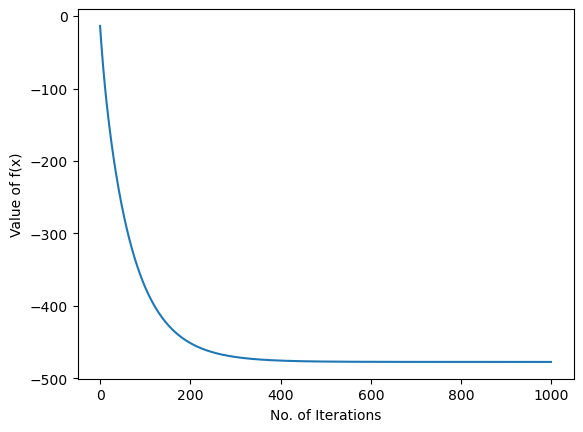

In [8]:
f_at_iter,minimiser_numerical = gD(x)

# Analytical Solution using SymPy

In [9]:
from sympy import symbols, Eq, solve

In [10]:
X_analytical = symbols('x1 x2 x3 x4 x5 x6 x7 x8 x9 x10')
X_analytical

(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10)

In [11]:
Gradient_eqns = {}
for i in range(10):
    Gradient_eqns[i] = Eq((np.dot((A[i]),X_analytical) + np.dot((A.T[i]),X_analytical)),2*B[i])

In [12]:
solution = solve((Gradient_eqns[0],Gradient_eqns[1],Gradient_eqns[2],Gradient_eqns[3],Gradient_eqns[4],Gradient_eqns[5],Gradient_eqns[6],Gradient_eqns[7],Gradient_eqns[8],Gradient_eqns[9]),X_analytical)

In [13]:
temp = list(solution.values())
minimiser_analytical = np.array(temp)
f(minimiser_analytical)

-477.618742370452

In [14]:
minimiser_analytical

array([17.3535114209853, 22.2355840993776, 20.4126068476874,
       20.5915534923148, 10.5735361285824, 34.4416133230065,
       11.8640823330376, 8.73543610964089, 30.1859968969729,
       11.8617707713536], dtype=object)

# Final Answers 
### The results from numerical method using gradient descent and analytical method by setting the gradient equal to 0 match exactly

In [15]:
minimiser_numerical

array([17.32202146, 22.23501235, 20.37741312, 20.55673353, 10.55547073,
       34.40353759, 11.86475049,  8.71466088, 30.14702833, 11.84483818])

In [16]:
minimiser_analytical

array([17.3535114209853, 22.2355840993776, 20.4126068476874,
       20.5915534923148, 10.5735361285824, 34.4416133230065,
       11.8640823330376, 8.73543610964089, 30.1859968969729,
       11.8617707713536], dtype=object)

In [17]:
print(f"Minimum value at minimiser_numerical is {f(minimiser_numerical)}")
print(f"Minimum value at minimiser_analytical is {f(minimiser_analytical)}")

Minimum value at minimiser_numerical is -477.61801596414233
Minimum value at minimiser_analytical is -477.618742370452


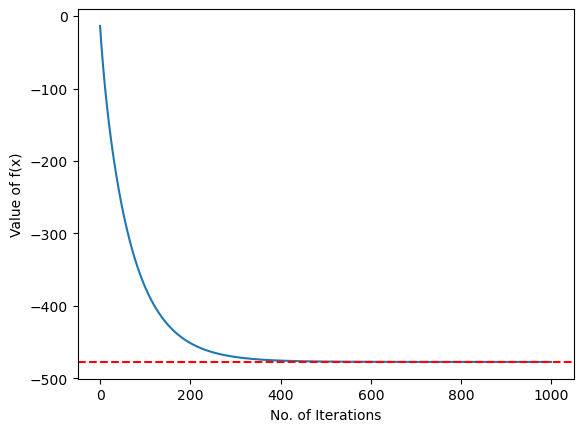

In [19]:
plt.plot(range(num_iter),f_at_iter)
plt.axhline(y=f(minimiser_analytical), color='red', linestyle='--', label=f'Analytical Minima {f(minimiser_analytical)}')
plt.xlabel('No. of Iterations')
plt.ylabel('Value of f(x)')
# ymin = -9  # Replace with your desired minimum y-value
# ymax = -10  # Replace with your desired maximum y-value
# plt.ylim(ymin, ymax)
plt.show()